# Data Analytics:
*(completed on 15/03/23)*

## Pandas:

In [2]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
!tree # see paths / directories

.
├── data
│   ├── AB_NYC_2019.csv
│   └── Neighbourhoods_New_York_City_Map.png
└── Data Analysis - New York City (Airbnb dataset).ipynb

2 directories, 3 files


## Data understanding:

In [3]:
listings_df = pd.read_csv('data/AB_NYC_2019.csv') # df means data frame

In [11]:
listings_df.head() # first 5 rows 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
listings_df.head(3) # first 3 (num) words

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [13]:
listings_df.shape # rows num, column num

(48895, 16)

In [14]:
listings_df.tail(3) # last 3 rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [23]:
listings_df.info() # column num, name, Dtype / object (mostly) = str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Data cleaning:

In [15]:
listings_df.isnull().sum() # value of null (empty) slots

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
listings_df.drop(columns=['availability_365'], inplace=True) # removes column 'availability_365'
listings_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2


In [25]:
listings_df[listings_df['price'] > 500].head(3) # prices > 500 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1
299,68974,Unique spacious loft on the Bowery,281229,Alicia,Manhattan,Little Italy,40.71943,-73.99627,Entire home/apt,575,2,191,2019-06-20,1.88,1
345,89427,The Brooklyn Waverly,116599,Sahr,Brooklyn,Clinton Hill,40.68613,-73.96536,Entire home/apt,650,5,0,0,0.00,3


In [8]:
listings_df[['id', 'name']]

,id,name
0,2539,Clean & quiet apt home by the park
1,2595,Skylit Midtown Castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !
3,3831,Cozy Entire Floor of Brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park
...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse
48891,36485057,Affordable room in Bushwick/East Williamsburg
48892,36485431,Sunny Studio at Historical Neighborhood
48893,36485609,43rd St. Time Square-cozy single bed


In [5]:
for list in list(listings_df.columns.values): # every null column replaced by 0
    listings_df.fillna({list: 0}, inplace=True)
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
listings_df[6:10][['host_name']] # list 6-9 host_name(s)

,host_name
6,Garon
7,Shunichi
8,MaryEllen
9,Ben


## Exploratory Data Analysis:

What are theb 10 most reviewed listings?:

In [12]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
listings_df.nlargest(10, 'number_of_reviews') # 10 largest 'number_of_reviews'

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


What are the NY neighourhood groups with listings?:

In [24]:
listings_df['neighbourhood_group'].unique() # 'neighbourhood_group' names

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

How many listings per neighourhood group?:

In [39]:
listings_df['neighbourhood_group'].value_counts() # listings num in 'neighbourhood_group'

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

What are the Top 10 neighourhoods with Airbnb listings?:

In [36]:
listings_df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

### Visual EDA:

<AxesSubplot: >

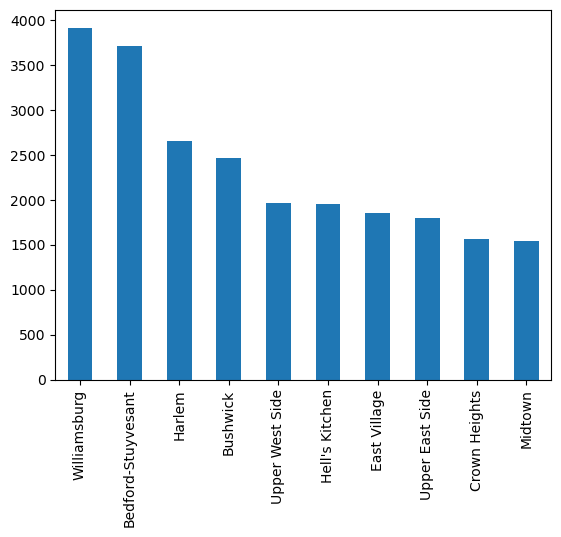

In [5]:
listings_df['neighbourhood'].value_counts().head(10).plot(kind='bar')

<AxesSubplot: xlabel='neighbourhood_group', ylabel='count'>

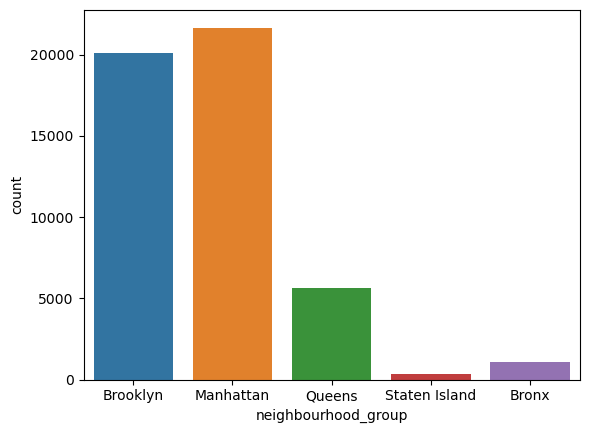

In [41]:
sns.countplot(data=listings_df, x='neighbourhood_group') # seaborn example of one on top

<AxesSubplot: xlabel='neighbourhood_group', ylabel='count'>

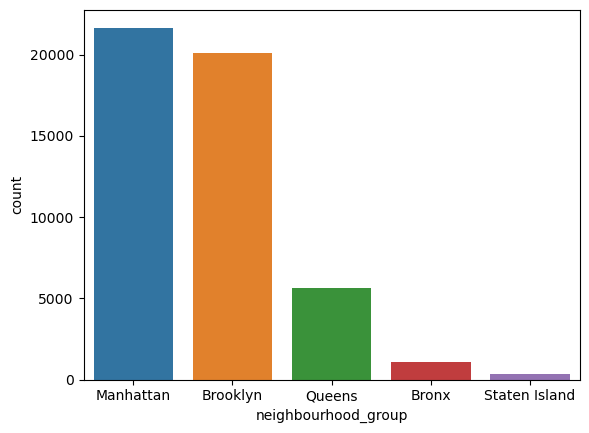

In [43]:
order = listings_df['neighbourhood_group'].value_counts().index # orders list for seaborn bar plot
sns.countplot(data=listings_df, x='neighbourhood_group', order=order)

What's the influence neigbourhood group on room types?:

In [46]:
listings_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<AxesSubplot: xlabel='neighbourhood_group', ylabel='count'>

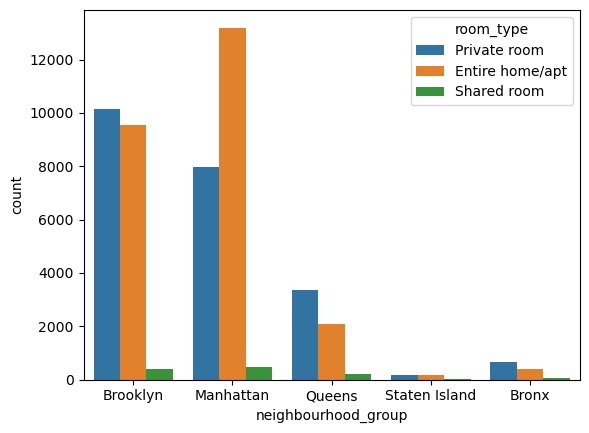

In [51]:
sns.countplot(data=listings_df, x='neighbourhood_group', hue='room_type') # types 

What is the distribution of listing prices?:

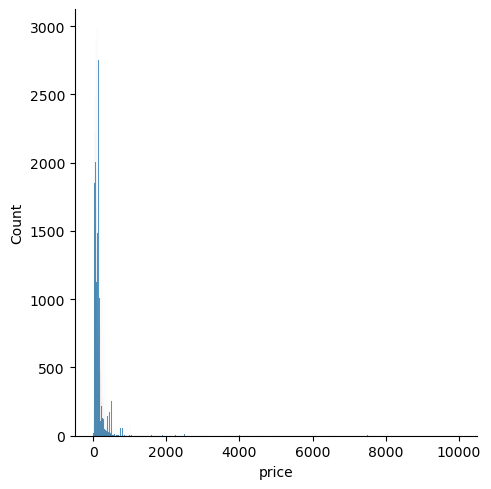

In [52]:
sns.displot(listings_df['price'])

How many listings are less expensive than $500/night?:

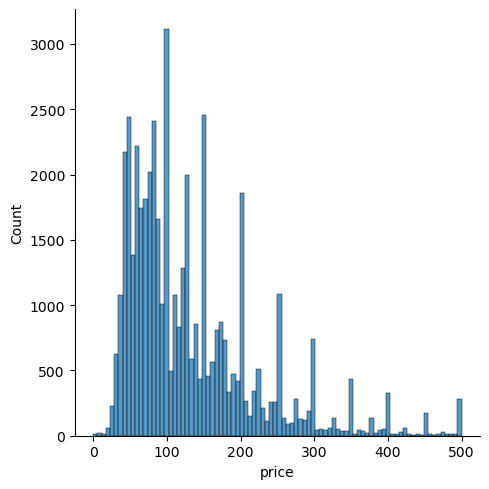

In [5]:
affordable_df = listings_df[listings_df['price'] <= 500] 
sns.displot(affordable_df['price'])

In [8]:
listings_df.price.mean() , affordable_df.price.mean()

(152.7206871868289, 131.53056362458466)

What is the distibution of listing prices based on the Neighbourhood Group?:

<AxesSubplot: xlabel='neighbourhood_group', ylabel='price'>

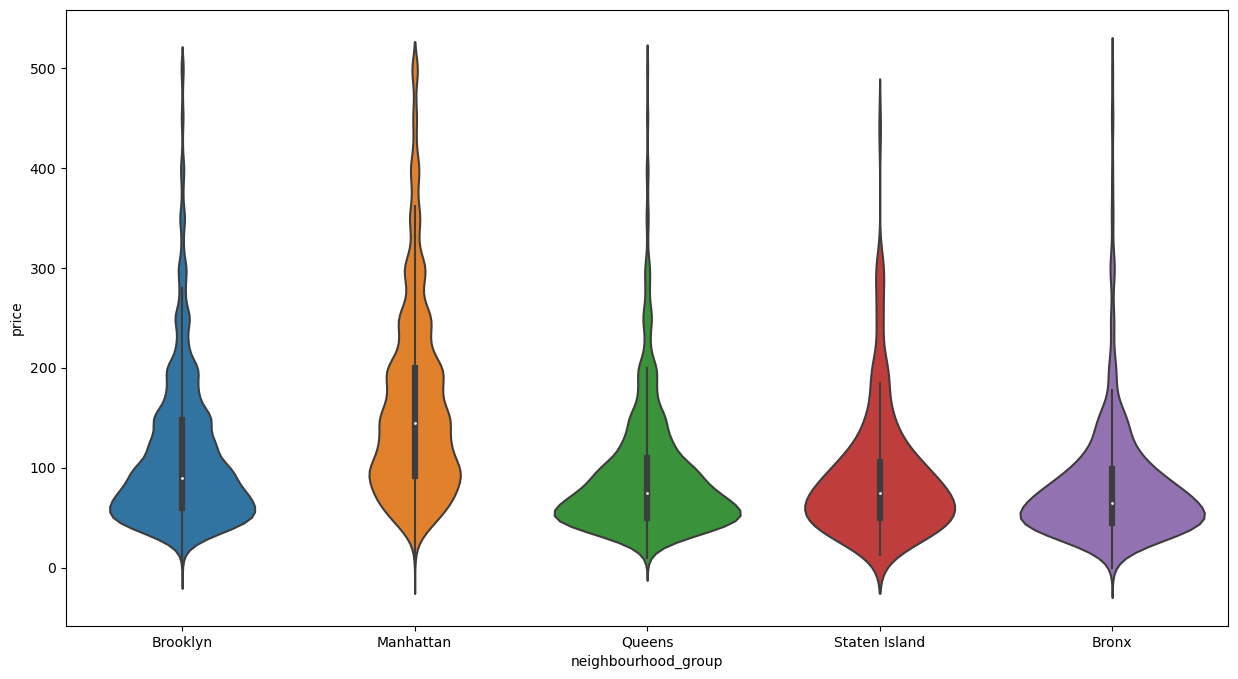

In [19]:
plt.figure(figsize=(15,8))# resize violins
sns.violinplot(data=affordable_df, x='neighbourhood_group' , y='price') # violinplot distribution

Can we plot the listings on a map?:

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

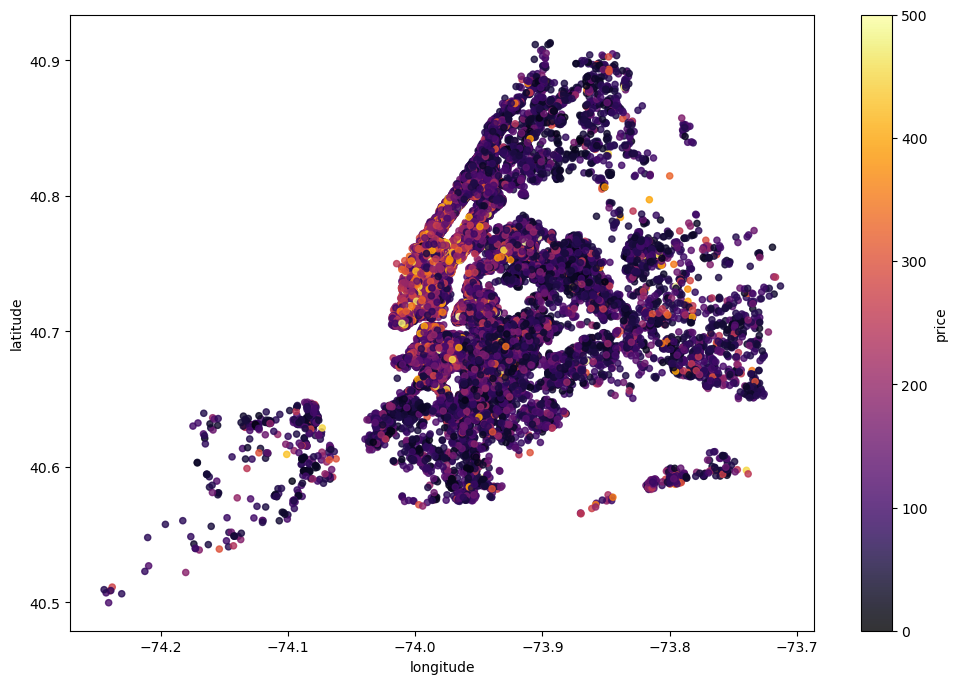

In [20]:
affordable_df.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    c='price',
    cmap='inferno',
    colorbar=True,
    alpha=0.8,
    figsize=(12,8))

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

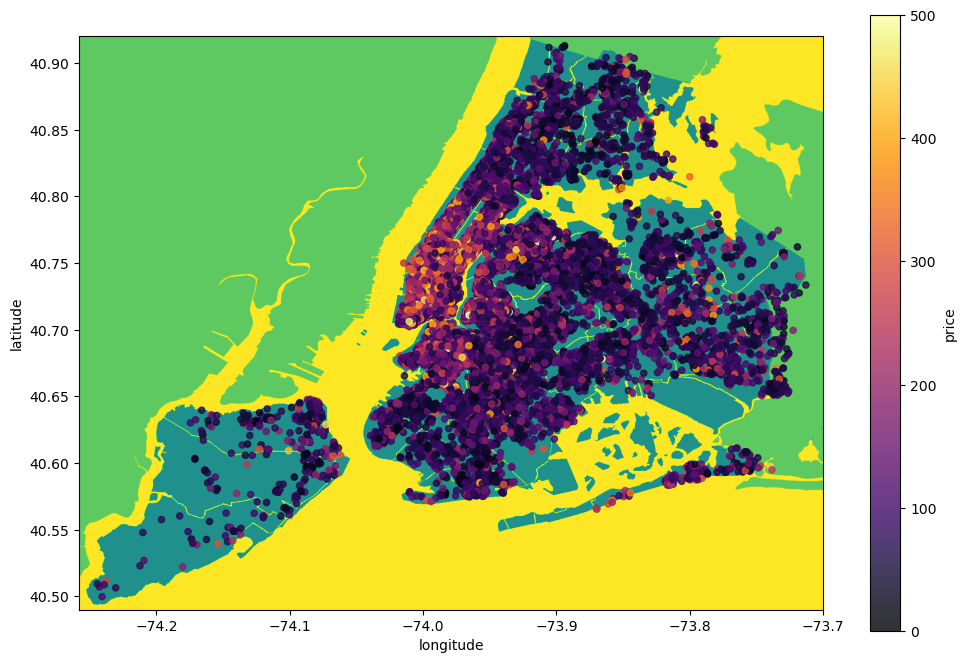

In [22]:
background_image = plt.imread('data/Neighbourhoods_New_York_City_Map.png') # heat map with geomap
plt.imshow(background_image, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

ax = plt.gca() 
affordable_df.plot(
  ax=ax,
  zorder=1,
  kind='scatter',
  x='longitude',
  y='latitude',
  c='price',
  cmap='inferno',
  colorbar=True,
  alpha=0.8,
  figsize=(12,8)
)